In [28]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join('data','mouse_drug_data.csv')
clinical_trial_data_to_load = os.path.join('data','clinicaltrial_data.csv')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_merged = pd.merge(mouse_drug_data,clinical_trial_data,how='outer')

# Display the data table for preview
mouse_clinical_merged.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [29]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'mean'})

# Function for preparing dataframes for plotting
def plot_ready(df):
    df = df.unstack('Drug')
    df.columns = df.columns.get_level_values(1)
    df = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
    return df

# Prepare dataframe for plotting and preview
mean_tumor = plot_ready(mean_tumor)
mean_tumor

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [30]:
# Store standard error values grouped by drug and timepoint
errors_tumor = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'sem'})

# Prepare dataframe for plotting and preview
errors_tumor = plot_ready(errors_tumor)
errors_tumor

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


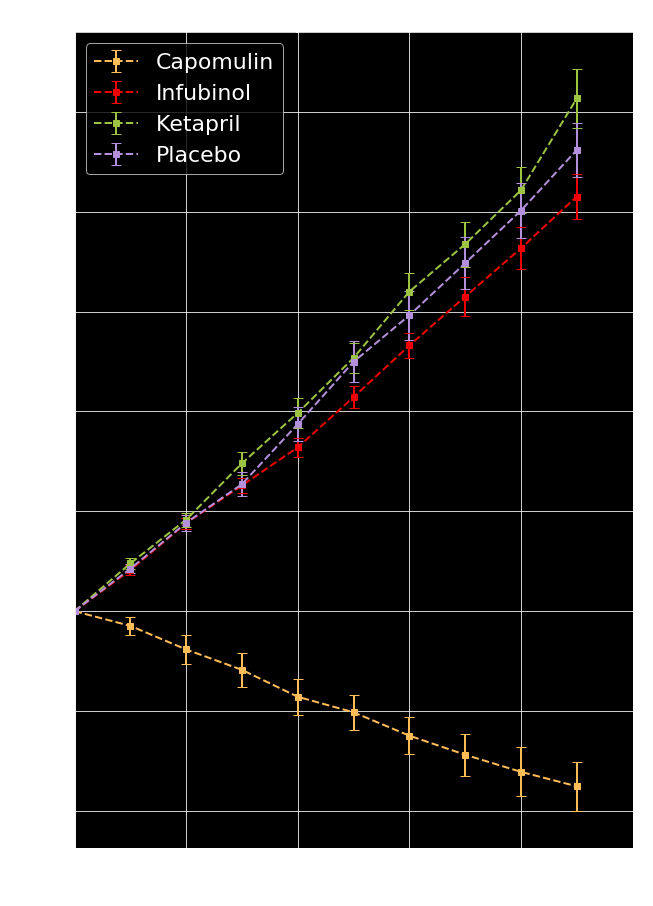

In [31]:
# Generate the Plot (with Error Bars)

# Font size
matplotlib.rcParams.update({'font.size': 22})

# Create figure and define ax plot
fig, ax = plt.subplots(figsize=(10,15))

# Plot colors
colors = ['#ffbc57', '#f00000','#9cc341','#b48fdc']
colors_number = 0

# Loop through each column in mean_tumor and plot error bars
for column in mean_tumor:
    ax.errorbar(
        mean_tumor.index, 
        mean_tumor[column], 
        yerr=errors_tumor[column], 
        fmt='--s',
        color=colors[colors_number],
        label=column,
        linewidth=2,
        elinewidth=2,
        capsize=5
        )
    colors_number += 1

# Format
ax.set_xlim(0, 50)
ax.title.set_text("Tumor Response to Treatment")
ax.set_xlabel("Days")
ax.set_ylabel("Mean Tumor Volume ($mm^3$)")
ax.grid()
ax.legend(loc='best')
plt.style.use(['dark_background'])

# Save Figure
fig.savefig('Tumor_Response_to_Treatment.jpeg', dpi=300)

## Metastatic Response to Treatment

In [32]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
count_survival = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':'mean'})

# Prepare dataframe for plotting and preview
count_survival = plot_ready(count_survival)
count_survival

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [33]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
errors_survival = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':'sem'})
errors_survival

# Prepare dataframe for plotting and preview
errors_survival = plot_ready(errors_survival)
errors_survival

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [34]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [35]:
# Store the Count of Mice Grouped by Drug and Timepoint, columns converted to drugs, convert to %
count_survival = mouse_clinical_merged.groupby(['Drug','Timepoint']).agg({'Mouse ID':'count'}).unstack('Drug').divide(25).multiply(100)

# Remove top header
count_survival.columns = count_survival.columns.get_level_values(1)

# Pull drug columns
count_survival = count_survival[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

count_survival

# Convert to DataFrame

# Preview DataFrame


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [36]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [37]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [38]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [39]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)